# API Automation 

A simple project to automate the process of loading data from a website using API. The data is obtaned from coinmarketcap which contains price information about the various cryptocurrencies currently available

### 1.  Retrieving data using API

In [1]:
 #This example uses Python 2.7 and the python-request library.

from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': 'ec03ea49-0742-4ead-b168-c934602da01d',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

{'status': {'timestamp': '2023-02-12T06:30:07.916Z', 'error_code': 0, 'error_message': None, 'elapsed': 18, 'credit_count': 1, 'notice': None, 'total_count': 8936}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 9976, 'date_added': '2013-04-28T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'parad

In [2]:
type(data)

dict

In [3]:
import pandas as pd

In [4]:
#This allows you to see all the columns
pd.set_option('display.max_columns', None)

In [5]:
#This allows normalizes the data and creating dataframe
df=pd.json_normalize(data['data'])

In [6]:
#Adding a timestamp column
df['timestamp']=pd.to_datetime('now')

In [7]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,9976,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.928842e+07,1.928842e+07,NaN,1,NaN,NaN,None,2023-02-12T06:28:00.000Z,21816.698962,1.517253e+10,-38.1690,0.029393,0.627317,-6.611174,15.888505,22.683162,36.969432,4.208098e+11,41.3283,4.581507e+11,None,2023-02-12T06:28:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-02-12 06:30:22.833650
1,1027,Ethereum,ETH,ethereum,6450,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.223739e+08,1.223739e+08,NaN,2,NaN,NaN,None,2023-02-12T06:28:00.000Z,1534.137683,4.779922e+09,-37.0391,0.060328,1.067486,-7.870186,8.879601,16.191170,29.749149,1.877384e+11,18.4377,1.877384e+11,None,2023-02-12T06:28:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-02-12 06:30:22.833650
2,825,Tether,USDT,tether,47420,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,6.838664e+10,7.314177e+10,NaN,3,NaN,NaN,None,2023-02-12T06:28:00.000Z,1.000181,2.124210e+10,-36.2798,-0.000773,-0.003669,-0.001794,0.007332,0.017924,0.149208,6.839902e+10,6.7174,7.315501e+10,None,2023-02-12T06:28:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-02-12 06:30:22.833650
3,1839,BNB,BNB,bnb,1185,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",2.000000e+08,1.578991e+08,1.599800e+08,NaN,4,NaN,NaN,None,2023-02-12T06:28:00.000Z,307.228477,3.302540e+08,-25.8763,0.224071,-0.169042,-7.553148,6.382916,11.877713,14.231319,4.851110e+10,4.7642,6.144570e+10,None,2023-02-12T06:28:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-02-12 06:30:22.833650
4,3408,USD Coin,USDC,usd-coin,10027,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,4.130659e+10,4.130659e+10,NaN,5,NaN,NaN,None,2023-02-12T06:28:00.000Z,0.999963,2.327162e+09,-31.5931,-0.006120,-0.002453,0.017189,-0.000813,-0.003992,-0.033943,4.130505e+10,4.0565,4.130505e+10,None,2023-02-12T06:28:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-02-12 06:30:22.833650
5,52,XRP,XRP,xrp,886,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.079908e+10,9.998913e+10,NaN,6,NaN,NaN,None,2023-02-12T06:28:00.000Z,0.381909,3.888264e+08,-46.6216,0.104224,0.044078,-6.689343,1.309776,-2.155491,16.913398,1.940062e+10,1.9053,3.819088e+10,None,2023-02-12T06:28:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-02-12 06:30:22.833650
6,4687,Binance USD,BUSD,binance-usd,6185,2019-09-20T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, binance-...",NaN,1.614891e+10,1.614891e+10,NaN,7,NaN,NaN,None,2023-02-12T06:28:00.000Z,1.000058,6.140486e+09,-37.3296,-0.011315,-0.000566,-0.011470,0.004212,0.041307,-0.062060,1.614984e+10,1.5861,1.614984e+10,None,2023-02-12T06:28:00.000Z,1839.0,BNB,BNB,bnb,BUSD-BD1,2023-02-12 06:30:22.833650
7,2010,Cardano,ADA,cardano,649,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.462379e+10,3.546743e+10,NaN,8,NaN,NaN,None,2023-02-12T06:28:00.000Z,0.366652,2.007837e+08,-35.6773,0.012200,1.899166,-7.966917,11.632824,18.944519,15.459519,1.269487e+10,1.2468,1.649932e+10,None,2023-02-12T06:28:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-02-12 06:30:22.833650
8,3890,Polygon,MATIC,polygon,585,2019-04-28T00:00:00.000Z,"[platform, enterprise-solutions, scaling, stat...",1.000000e+10,8.734317e+09,1.000000e+10,N

###  2. Automating the  task

In [8]:
#Create the function to load the above data using API
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': 'ec03ea49-0742-4ead-b168-c934602da01d',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    df=pd.json_normalize(data['data'])
    df['timestamp']=pd.to_datetime('now')
    df
   
    
    if not os.path.isfile(r'C:\Users\ELITEBOOK COI5\Desktop\Michael Work\Coding & Programming\API_Automation\API.csv'):
        df.to_csv(r'C:\Users\ELITEBOOK COI5\Desktop\Michael Work\Coding & Programming\API_Automation\API.csv', header='column_names')
    else:
        df.to_csv(r'C:\Users\ELITEBOOK COI5\Desktop\Michael Work\Coding & Programming\API_Automation\API.csv', mode='a', header=False)
    

In [9]:
#Setting timer to run the above function
import os
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner completed')
    sleep(60) #sleep for 1 minute
exit()
    

API Runner completed
API Runner completed
API Runner completed
API Runner completed


KeyboardInterrupt: 

In [11]:
df72=pd.read_csv(r'C:\Users\ELITEBOOK COI5\Desktop\Michael Work\Coding & Programming\API_Automation\API.csv')
df72

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,9976,2013-04-28T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.0,1.928831e+07,1.928831e+07,NaN,1,NaN,NaN,NaN,2023-02-12T05:23:00.000Z,21803.274232,1.526502e+10,-39.8710,0.029197,0.493434,-6.735654,15.751992,22.693201,36.312879,4.205484e+11,41.3445,4.578688e+11,NaN,2023-02-12T05:23:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-02-12 05:24:29.994377
1,1,1027,Ethereum,ETH,ethereum,6450,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.223739e+08,1.223739e+08,NaN,2,NaN,NaN,NaN,2023-02-12T05:23:00.000Z,1532.984607,4.808437e+09,-38.3757,0.115348,0.844756,-7.964005,8.515238,16.228448,29.124494,1.875973e+11,18.4439,1.875973e+11,NaN,2023-02-12T05:23:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-02-12 05:24:29.994377
2,2,825,Tether,USDT,tether,47420,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,6.838664e+10,7.314177e+10,NaN,3,NaN,NaN,NaN,2023-02-12T05:23:00.000Z,1.000217,2.138873e+10,-37.9289,0.000878,0.003449,0.002066,0.013131,0.021301,0.148531,6.840147e+10,6.7246,7.315763e+10,NaN,2023-02-12T05:23:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-02-12 05:24:29.994377
3,3,1839,BNB,BNB,bnb,1185,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",200000000.0,1.578991e+08,1.599800e+08,NaN,4,NaN,NaN,NaN,2023-02-12T05:23:00.000Z,306.579273,3.340196e+08,-27.4295,-0.069589,-0.267133,-7.170881,5.730388,11.614048,13.457805,4.840859e+10,4.7593,6.131585e+10,NaN,2023-02-12T05:23:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-02-12 05:24:29.994377
4,4,3408,USD Coin,USDC,usd-coin,10027,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,4.130664e+10,4.130664e+10,NaN,5,NaN,NaN,NaN,2023-02-12T05:23:00.000Z,1.000093,2.334368e+09,-33.1500,0.013482,0.002237,0.014889,0.010562,0.005428,-0.034361,4.131046e+10,4.0615,4.131046e+10,NaN,2023-02-12T05:23:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-02-12 05:24:29.994377
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,10,5426,Solana,SOL,solana,433,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,3.753078e+08,5.393127e+08,NaN,11,NaN,NaN,NaN,2023-02-12T06:32:00.000Z,20.843236,2.325617e+08,-57.0634,0.573765,2.811616,-14.414669,23.208559,50.200691,64.549971,7.822628e+09,0.7683,1.124102e+10,NaN,2023-02-12T06:32:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-02-12 06:33:28.293581
86,11,6636,Polkadot,DOT,polkadot-new,467,2020-08-19T00:00:00.000Z,"['substrate', 'polkadot', 'binance-chain', 'po...",NaN,1.168084e+09,1.282314e+09,NaN,12,9.048698e+08,5.652666e+09,NaN,2023-02-12T06:32:00.000Z,6.246939,1.318489e+08,-45.6695,0.093645,0.713762,-8.771347,19.276337,18.409895,12.572086,7.296948e+09,0.7167,8.010539e+09,NaN,2023-02-12T06:32:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-02-12 06:33:28.293581
87,12,5994,Shiba Inu,SHIB,shiba-inu,487,2020-08-01T00:00:00.000Z,"['memes', 'ethereum-ecosystem', 'doggone-dogge...",NaN,5.490633e+14,5.897350e+14,NaN,13,NaN,NaN,NaN,2023-02-12T06:32:00.000Z,0.000013,2.706978e+08,-42.8260,-0.482792,2.281913,-13.973600,35.393690,40.427719,46.623519,7.057348e+09,0.6931,7.580119e+09,NaN,2023-02-12T06:32:00.000Z,1027.0,Ethereum,ETH,ethereum

In [12]:
#removing the scientific notation
pd.set_option('display.float_format',lambda x: '%.5f' % x)

In [13]:
df72

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,9976,2013-04-28T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19288312.00000,19288312.00000,NaN,1,NaN,NaN,NaN,2023-02-12T05:23:00.000Z,21803.27423,15265024556.44946,-39.87100,0.02920,0.49343,-6.73565,15.75199,22.69320,36.31288,420548356000.23016,41.34450,457868758863.13000,NaN,2023-02-12T05:23:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-02-12 05:24:29.994377
1,1,1027,Ethereum,ETH,ethereum,6450,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,122373866.21780,122373866.21780,NaN,2,NaN,NaN,NaN,2023-02-12T05:23:00.000Z,1532.98461,4808437193.54894,-38.37570,0.11535,0.84476,-7.96400,8.51524,16.22845,29.12449,187597253194.45844,18.44390,187597253194.45999,NaN,2023-02-12T05:23:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-02-12 05:24:29.994377
2,2,825,Tether,USDT,tether,47420,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,68386642034.94386,73141766321.23428,NaN,3,NaN,NaN,NaN,2023-02-12T05:23:00.000Z,1.00022,21388731322.42199,-37.92890,0.00088,0.00345,0.00207,0.01313,0.02130,0.14853,68401472996.67087,6.72460,73157628523.34000,NaN,2023-02-12T05:23:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-02-12 05:24:29.994377
3,3,1839,BNB,BNB,bnb,1185,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",200000000.00000,157899099.25881,159979963.59043,NaN,4,NaN,NaN,NaN,2023-02-12T05:23:00.000Z,306.57927,334019602.74326,-27.42950,-0.06959,-0.26713,-7.17088,5.73039,11.61405,13.45780,48408591007.02316,4.75930,61315854535.28000,NaN,2023-02-12T05:23:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-02-12 05:24:29.994377
4,4,3408,USD Coin,USDC,usd-coin,10027,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,41306641981.47082,41306641981.47082,NaN,5,NaN,NaN,NaN,2023-02-12T05:23:00.000Z,1.00009,2334367874.54537,-33.15000,0.01348,0.00224,0.01489,0.01056,0.00543,-0.03436,41310463220.38551,4.06150,41310463220.39000,NaN,2023-02-12T05:23:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-02-12 05:24:29.994377
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,10,5426,Solana,SOL,solana,433,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,375307756.72835,539312704.88753,NaN,11,NaN,NaN,NaN,2023-02-12T06:32:00.000Z,20.84324,232561732.58283,-57.06340,0.57376,2.81162,-14.41467,23.20856,50.20069,64.54997,7822628131.66071,0.76830,11241021964.99000,NaN,2023-02-12T06:32:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-02-12 06:33:28.293581
86,11,6636,Polkadot,DOT,polkadot-new,467,2020-08-19T00:00:00.000Z,"['substrate', 'polkadot', 'binance-chain', 'po...",NaN,1168083662.42035,1282314169.36955,NaN,12,904869778.00000,5652666406.61431,NaN,2023-02-12T06:32:00.000Z,6.24694,131848949.44146,-45.66950,0.09364,0.71376,-8.77135,19.27634,18.40989,12.57209,7296947515.77669,0.71670,8010538537.32000,NaN,2023-02-12T06:32:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-02-12 06:33:28.293581
87,12,5994,Shiba Inu,SHIB,shiba-inu,487,2020-08-01T00:00:00.000Z,"['memes', 'ethereum-ecosystem', 'doggone-dogge...",NaN,549063278876301.93750,589735030408322.75000,NaN,13,NaN,NaN,NaN,2023-02-12T06:32:00.000Z,0.00001,270697812.09490,-42

In [14]:
# Now let's look at the coin trends over time
df3=df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.02111,0.60256,-6.61676,15.84794,22.69368,36.83266
Ethereum,0.06019,1.07286,-7.87643,8.84614,16.18396,29.63041
Tether,0.00049,0.00375,0.00084,0.01031,0.01761,0.15387
BNB,0.21779,-0.12862,-7.53063,6.34209,11.87851,14.13212
USD Coin,-0.00462,-0.00473,0.01887,0.01026,-0.00313,-0.03926
XRP,0.08403,0.01962,-6.69564,1.32070,-2.20936,16.60684
Binance USD,-0.00654,-0.01509,-0.01816,0.02935,0.01445,-0.06143
Cardano,0.00836,1.90537,-7.99213,11.54116,18.91013,15.40939
Polygon,0.81329,1.72869,1.64232,38.07082,36.88008,44.42930


In [15]:
df4=df3.stack()

In [16]:
df4

name                                 
Bitcoin  quote.USD.percent_change_1h     0.02111
         quote.USD.percent_change_24h    0.60256
         quote.USD.percent_change_7d    -6.61676
         quote.USD.percent_change_30d   15.84794
         quote.USD.percent_change_60d   22.69368
                                          ...   
TRON     quote.USD.percent_change_24h    0.88668
         quote.USD.percent_change_7d    -0.75076
         quote.USD.percent_change_30d   11.23146
         quote.USD.percent_change_60d   16.64202
         quote.USD.percent_change_90d   38.50877
Length: 90, dtype: float64

In [17]:
df5=df4.to_frame(name='values')
df5

values
name                                         
Bitcoin quote.USD.percent_change_1h   0.02111
        quote.USD.percent_change_24h  0.60256
        quote.USD.percent_change_7d  -6.61676
        quote.USD.percent_change_30d 15.84794
        quote.USD.percent_change_60d 22.69368
...                                       ...
TRON    quote.USD.percent_change_24h  0.88668
        quote.USD.percent_change_7d  -0.75076
        quote.USD.percent_change_30d 11.23146
        quote.USD.percent_change_60d 16.64202
        quote.USD.percent_change_90d 38.50877

[90 rows x 1 columns]

In [18]:
index_range=df5.count()

In [19]:
index_range

values    90
dtype: int64

In [20]:
# Set the above DataFrame index object as the index
# using set_index() function

index=pd.Index(range(90))

df6=df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.02111
1,Bitcoin,quote.USD.percent_change_24h,0.60256
2,Bitcoin,quote.USD.percent_change_7d,-6.61676
3,Bitcoin,quote.USD.percent_change_30d,15.84794
4,Bitcoin,quote.USD.percent_change_60d,22.69368
...,...,...,...
85,TRON,quote.USD.percent_change_24h,0.88668
86,TRON,quote.USD.percent_change_7d,-0.75076
87,TRON,quote.USD.percent_change_30d,11.23146
88,TRON,quote.USD.percent_change_60d,16.64202


In [21]:
# Change the column name
df7=df6.rename(columns={'level_1':'percent_change'})
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h'],['1h'])


In [22]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['24h','7d','30d','60d','90d'])
df7

,name,percent_change,values
0,Bitcoin,1h,0.02111
1,Bitcoin,24h,0.60256
2,Bitcoin,7d,-6.61676
3,Bitcoin,30d,15.84794
4,Bitcoin,60d,22.69368
...,...,...,...
85,TRON,24h,0.88668
86,TRON,7d,-0.75076
87,TRON,30d,11.23146
88,TRON,60d,16.64202


### 3. Simple visualization

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

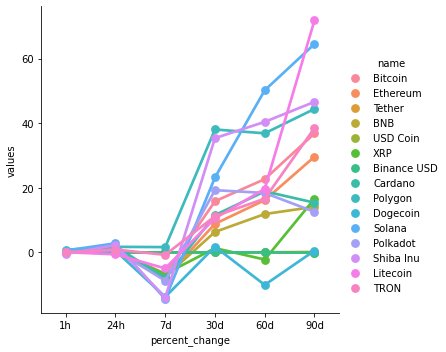

In [24]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')

In [25]:
#we are going to create a dataframe with the columns we want
df10=df72[['name', 'quote.USD.price','timestamp']]
df10=df10.query("name=='Bitcoin'")
df10

,name,quote.USD.price,timestamp
0,Bitcoin,21803.27423,2023-02-12 05:24:29.994377
15,Bitcoin,21803.92224,2023-02-12 05:25:30.718017
30,Bitcoin,21816.69896,2023-02-12 06:30:24.234060
45,Bitcoin,21817.16272,2023-02-12 06:31:26.192159
60,Bitcoin,21818.35944,2023-02-12 06:32:27.226264
75,Bitcoin,21817.16731,2023-02-12 06:33:28.293581


In [26]:
df72

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,9976,2013-04-28T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19288312.00000,19288312.00000,NaN,1,NaN,NaN,NaN,2023-02-12T05:23:00.000Z,21803.27423,15265024556.44946,-39.87100,0.02920,0.49343,-6.73565,15.75199,22.69320,36.31288,420548356000.23016,41.34450,457868758863.13000,NaN,2023-02-12T05:23:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-02-12 05:24:29.994377
1,1,1027,Ethereum,ETH,ethereum,6450,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,122373866.21780,122373866.21780,NaN,2,NaN,NaN,NaN,2023-02-12T05:23:00.000Z,1532.98461,4808437193.54894,-38.37570,0.11535,0.84476,-7.96400,8.51524,16.22845,29.12449,187597253194.45844,18.44390,187597253194.45999,NaN,2023-02-12T05:23:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-02-12 05:24:29.994377
2,2,825,Tether,USDT,tether,47420,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,68386642034.94386,73141766321.23428,NaN,3,NaN,NaN,NaN,2023-02-12T05:23:00.000Z,1.00022,21388731322.42199,-37.92890,0.00088,0.00345,0.00207,0.01313,0.02130,0.14853,68401472996.67087,6.72460,73157628523.34000,NaN,2023-02-12T05:23:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-02-12 05:24:29.994377
3,3,1839,BNB,BNB,bnb,1185,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",200000000.00000,157899099.25881,159979963.59043,NaN,4,NaN,NaN,NaN,2023-02-12T05:23:00.000Z,306.57927,334019602.74326,-27.42950,-0.06959,-0.26713,-7.17088,5.73039,11.61405,13.45780,48408591007.02316,4.75930,61315854535.28000,NaN,2023-02-12T05:23:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-02-12 05:24:29.994377
4,4,3408,USD Coin,USDC,usd-coin,10027,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,41306641981.47082,41306641981.47082,NaN,5,NaN,NaN,NaN,2023-02-12T05:23:00.000Z,1.00009,2334367874.54537,-33.15000,0.01348,0.00224,0.01489,0.01056,0.00543,-0.03436,41310463220.38551,4.06150,41310463220.39000,NaN,2023-02-12T05:23:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-02-12 05:24:29.994377
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,10,5426,Solana,SOL,solana,433,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,375307756.72835,539312704.88753,NaN,11,NaN,NaN,NaN,2023-02-12T06:32:00.000Z,20.84324,232561732.58283,-57.06340,0.57376,2.81162,-14.41467,23.20856,50.20069,64.54997,7822628131.66071,0.76830,11241021964.99000,NaN,2023-02-12T06:32:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-02-12 06:33:28.293581
86,11,6636,Polkadot,DOT,polkadot-new,467,2020-08-19T00:00:00.000Z,"['substrate', 'polkadot', 'binance-chain', 'po...",NaN,1168083662.42035,1282314169.36955,NaN,12,904869778.00000,5652666406.61431,NaN,2023-02-12T06:32:00.000Z,6.24694,131848949.44146,-45.66950,0.09364,0.71376,-8.77135,19.27634,18.40989,12.57209,7296947515.77669,0.71670,8010538537.32000,NaN,2023-02-12T06:32:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-02-12 06:33:28.293581
87,12,5994,Shiba Inu,SHIB,shiba-inu,487,2020-08-01T00:00:00.000Z,"['memes', 'ethereum-ecosystem', 'doggone-dogge...",NaN,549063278876301.93750,589735030408322.75000,NaN,13,NaN,NaN,NaN,2023-02-12T06:32:00.000Z,0.00001,270697812.09490,-42

<AxesSubplot:xlabel='timestamp', ylabel='quote.USD.price'>

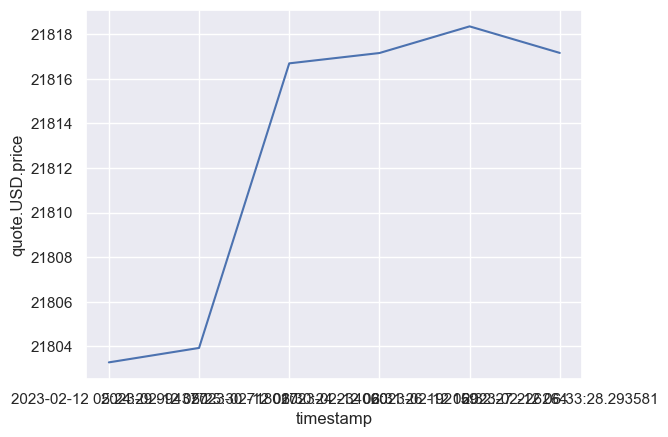

In [27]:
sns.set_theme(style='darkgrid')
sns.lineplot(x='timestamp', y='quote.USD.price', data=df10)